In [3]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [4]:
import locale
import calendar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [5]:
# Load databases

# Team final rankings at each WC
df_rank = pd.read_csv('wc_rankings.csv')
# Germany considers West Germany as a part of their footballing history (not East Germany)
df_rank = df_rank.replace(to_replace="West Germany", value="Germany")

# Record transfer fees paid
locale.setlocale(locale.LC_NUMERIC, '')
df_tranfer = pd.read_csv("record_transfers.csv")
df_tranfer['fee_pounds'] = df_tranfer.fee_pounds.apply(locale.atof)

# 
df_squads = pd.read_csv('wc_squads.csv')
df_squads = df_squads.replace(to_replace="Korea Republic", value="South Korea")
df_squads = df_squads.replace(to_replace="West Germany", value="Germany")
df_squads = df_squads.replace(to_replace="Dutch East Indies (Indonesia)", value="Dutch East Indies")
df_squads.dob = pd.to_datetime(df_squads.dob)
df_squads['birth_month'] = df_squads.dob.map(lambda x: x.month)

df_league_data = pd.read_csv("top_five_leagues.csv")

# Soccer investment
World soccer has seen significant investment, particularly in recent years. The additional resources has affected the sport in unique ways. This project attemtps to investigate these effects, in particular the effect on the FIFA World Cup.

Below is plot of the world record transfer fee paid between soccer clubs. The record transfer fee has increased over the years, however the exponential increase in the last few decades has been driven by the additional resources soccer clubs have obtained.

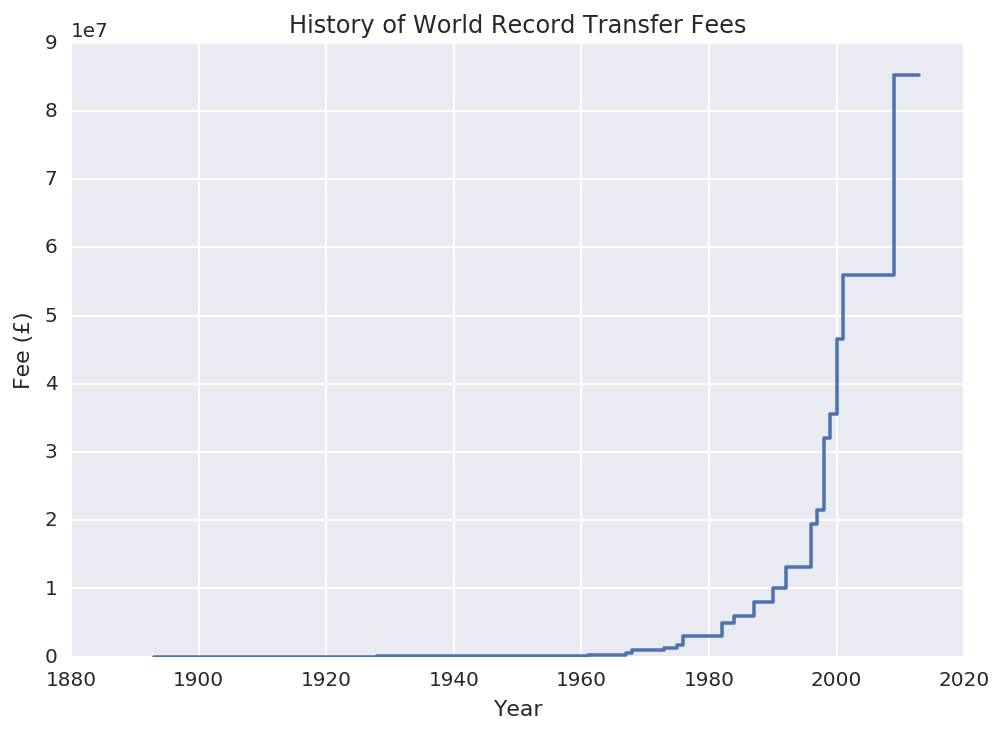

In [6]:
plt.plot(df_tranfer['year'], df_tranfer['fee_pounds'], linestyle='steps')
plt.xlabel('Year');
plt.ylabel(u'Fee (\u00A3)');
plt.title('History of World Record Transfer Fees');

# World Cup Performance and Soccer history
National teams the regularly qualify for the World Cup are likely to have a strong soccer tradition. This tradition means children are likely to play soccer growing up, providing the nation with a larger pool of players to select from.

The average performance of a nation at the World Cup was compared to their qualification record for the tournament. A weak trend was observed where teams performed better when regularly qualified. This model needs refinement as nations such as Croatia may have less of a qualification record, but their time as a part of Yugoslavia should be included in their footballing tradition.

In [7]:
# league data
df_rank = pd.read_csv('wc_rankings.csv')
# Germany includes West (not East) Germany in their footballing history
df_rank = df_rank.replace(to_replace="West Germany", value="Germany")

team_avg_ranking = df_rank.groupby('team').ranking.mean().to_frame()
team_num_wc = df_rank.team.value_counts().head(50).to_frame()
        
df_team_rank = team_avg_ranking.join(team_num_wc)
df_team_rank = df_team_rank.dropna()

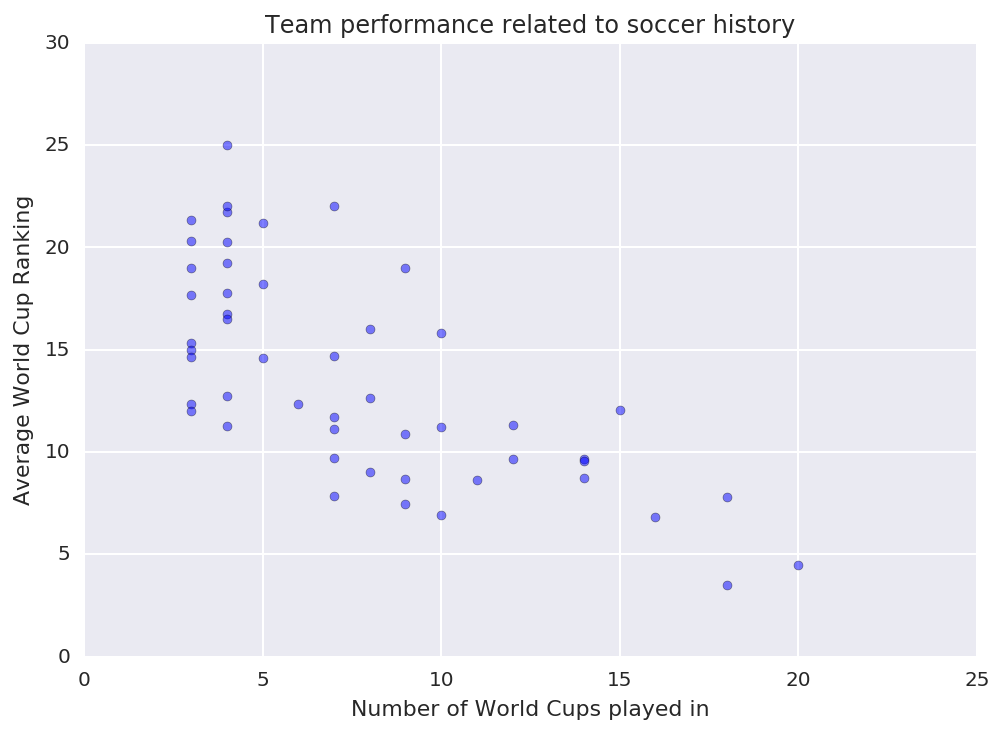

In [8]:
plt.scatter(df_team_rank.team, df_team_rank.ranking, alpha=0.5)
plt.xlabel('Number of World Cups played in');
plt.ylabel(u'Average World Cup Ranking');
plt.title('Team performance related to soccer history');

# The Best Professional Leagues
The quality of players available to a national team should be an important factor in a team's performance at the World Cup. The resources available to soccer clubs means the best players play in the best professional leagues, if the transfer market is efficient. Given an efficient market, the best leagues should be the most represented at the World Cup.

The index below is a ratio of the number of players at the World Cup from a given league to the average squad size for the World Cup. As expected, the top 10 leagues are mainly found in Western Europe, with the top 5 in England, Spain, Germany, Italy, and France. This is consistent with other metrics used for league comparisons.

In [9]:
df_squads = pd.read_csv('wc_squads.csv')
df_squads = df_squads.replace(to_replace="Korea Republic", value="South Korea")
df_squads = df_squads.replace(to_replace="West Germany", value="Germany")
df_squads = df_squads.replace(to_replace="Dutch East Indies (Indonesia)", value="Dutch East Indies")

grouped = df_squads.groupby('year') # Why groupby?
club_country = df_squads.club_country.unique()
club_country.sort()
df_clb_ctry = pd.DataFrame({"club_country":club_country})
df_clb_ctry = df_clb_ctry.set_index("club_country")

In [10]:
for year in df_squads.year.unique():
    country_to_club = grouped.club_country.value_counts()[year] / grouped.team.value_counts()[year]
    df_clb_ctry = df_clb_ctry.join(country_to_club.to_frame(year))
    
df_clb_ctry = df_clb_ctry.fillna(0) # If NaN, country league not represented at the world cup
df_clb_ctry = df_clb_ctry.T

/Users/pierreb/.virtualenvs/datasci/lib/python2.7/site-packages/pandas/indexes/multi.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


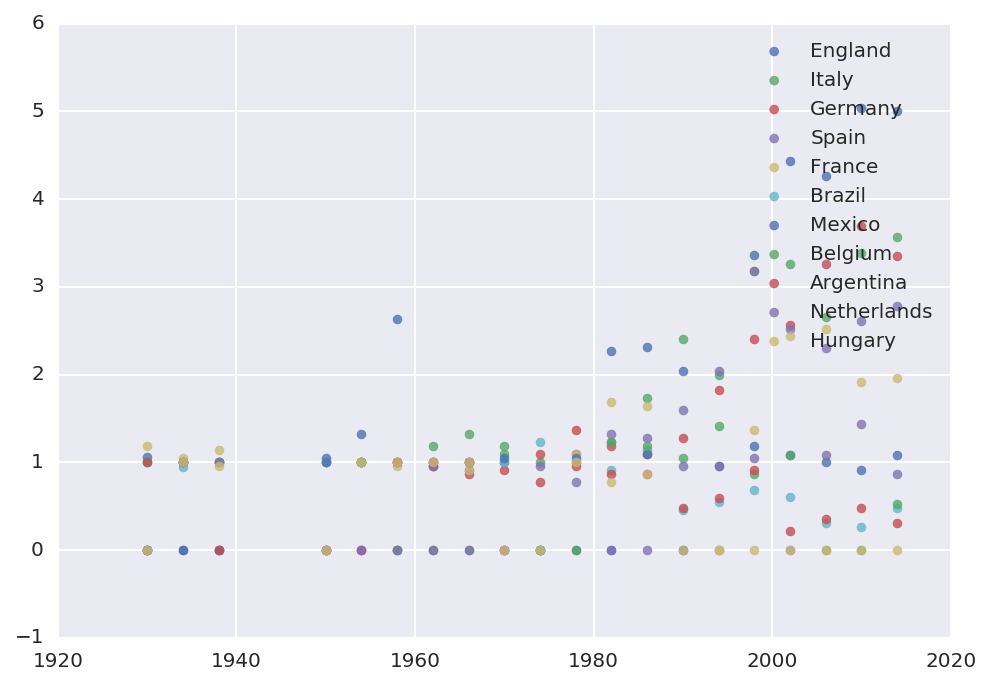

In [11]:
palette = itertools.cycle(sns.color_palette())
for num, country in enumerate(df_clb_ctry.sum().sort_values(ascending=False).head(11).index):
    plt.scatter(df_clb_ctry.index, df_clb_ctry[country], alpha=0.8, color=next(palette), label=country)

plt.legend();

# Nations with the most Expatriate Players in the top 5 leagues
A strong national league helps a nation develop its young players, providing them experience with better quality players. Nations with weaker national leagues depend on their players earning contracts with clubs in these leagues. These expatriate players are reguarly the leading players for a national team.

France had the most expatriate players of the top 5 leagues between 1995 and 2015. The expatriate players in the top 5 leagues from above between 1995 and 2015 shows the majority of these players came from Brazil and Argentina.

In [12]:
df_league_data = pd.read_csv("top_five_leagues.csv")
df_expats = df_league_data[df_league_data.nation!=df_league_data.nationality]

In [13]:
for season in df_expats.season.unique():
    nationality_expats = df_expats.groupby('season').nationality.value_counts()[season].head(10)
    nation_expats = df_expats.groupby('season').nation.value_counts()[season]

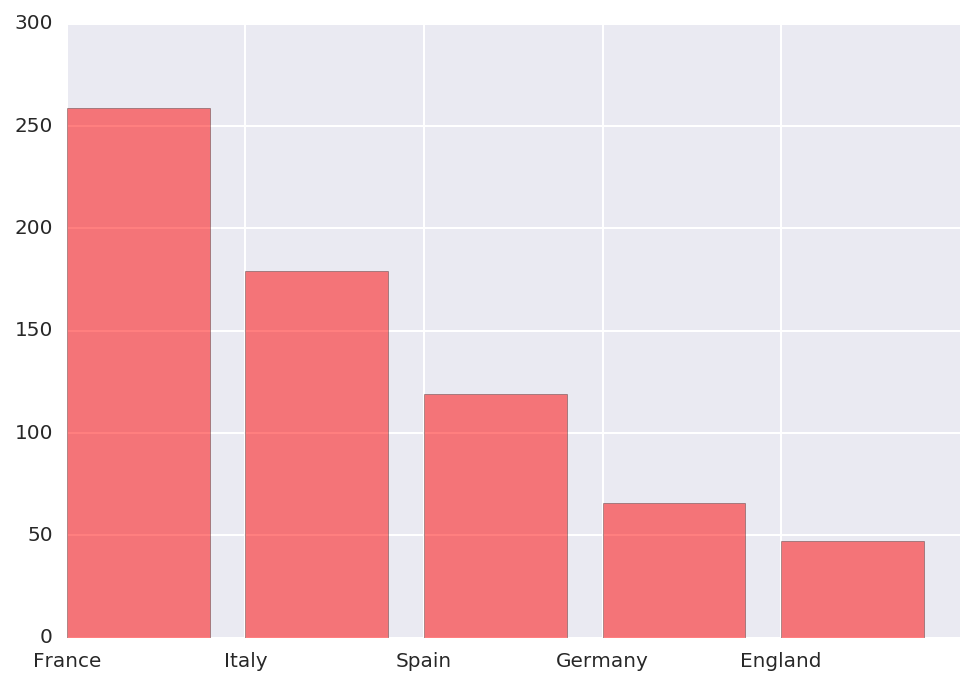

In [14]:
# bar plot nationality_expats
bar_plt = plt.bar(np.arange(5), nation_expats.values, color="red", alpha=0.5)
plt.xticks(np.arange(5), tuple(nation_expats.index));

# Expatirate players and World Cup performance
The presence of expatriate players in a World Cup squad was expected to be an indicator of a national team's performance at the World Cup. Players would not be purchased from a local league unless they were of sufficient quality. Below it is shown that there is not correlation between the percentage of a nation's players playing in other professional leagues and World Cup performance.

This model requires further refinement, as nations such as England and Spain have very few players playing outside their own national leagues, while Brazil has many players in other national leagues. This model currently does not account for the strength of the leagues that the players are playing in. The model above needs to be intergrated with this model to better understand the league data.

In [15]:
grouped = df_squads.groupby(["year","team"])

expat_players = []
for (yr, team), group in grouped:
    pct_local = sum(group.club_country.values==group.team.values)*1.0/group.club_country.count()
    expat_players.append([yr, team, 1 - pct_local])

df_pct_expats = pd.DataFrame(expat_players, columns=['year', 'team', 'pct_expat'])
df_expat_to_rank = df_pct_expats.merge(df_rank, on=['year', 'team'])

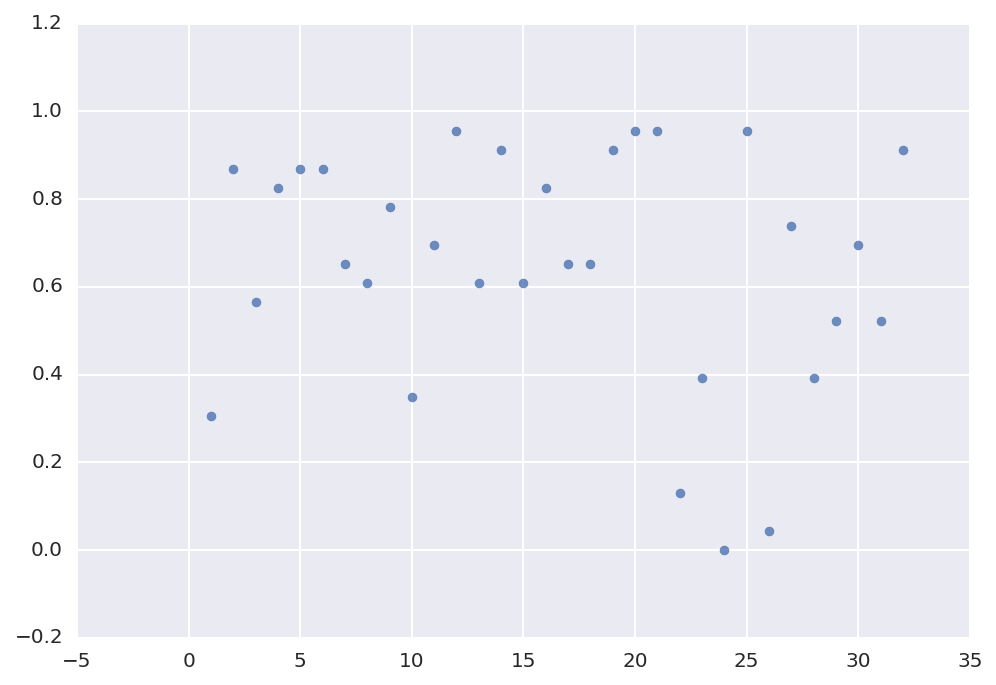

In [16]:
palette = itertools.cycle(sns.color_palette())
for year, group in df_expat_to_rank.groupby('year'):
    if year==2014:
        plt.scatter(group.ranking, group.pct_expat, alpha=0.8, color=next(palette))

# Player information
The quality of players in World Cup squads are expected to have the greatest effect on tournament performance. This section attempts to distil player effects. This started with an interesting study on the NHL showing their bias for players born in the first quarted of the year. This was due to children playing in age groups, so children born in the first quarter were on average a bit taller, bigger, and faster than the rest. This led to these children having more training and game time, better preparing them for professional sports.

Investigating this for World Cup players shows a larger number of players born in the first quarter, but not sufficient enough to confirm a bias. Breaking down individual World Cups shows variation in the highest represented birth months. A better way to test player biases would be to consider professional league data, where data can be observed annually as opposed to quadrennially with World Cup data.

In [17]:
# Create a mapping of month number to string abbreviation
month_map = {k: v for k,v in enumerate(calendar.month_abbr)}

# convert date of birth column to datetime
df_squads.dob = pd.to_datetime(df_squads.dob) 
# extract player birth month number
df_squads['birth_month'] = df_squads.dob.map(lambda x: x.month) 

In [25]:
df_mths_by_year = {}
# create data from of birth month data
df_mth = df_squads.birth_month.value_counts().sort_index() 
# convert birth month number to month ("01" to "Jan"'")
df_mth.index = df_mth.index.map(lambda x: month_map[x])
df_mth = df_mth.to_frame()
df_mth.columns = ['num_plyrs']
df_mth['year'] = 'All'

frames = [df_mth]
for year, group in df_squads.groupby('year'):
    df_mth_yr = group.birth_month.value_counts().sort_index()
    df_mth_yr.index = df_mth_yr.index.map(lambda x: month_map[x]) 
    df_mth_yr = df_mth_yr.to_frame()
    df_mth_yr.columns = ['num_plyrs']
    df_mth_yr['year'] = year
    frames.append(df_mth_yr)

result = pd.concat(frames)

In [27]:
result[result.year==2014]

,num_plyrs,year
Jan,72,2014
Feb,78,2014
Mar,66,2014
Apr,61,2014
May,71,2014
Jun,61,2014
Jul,57,2014
Aug,58,2014
Sep,64,2014
Oct,48,2014


In [87]:
result[result.year==2010]

,num_plyrs,year
Jan,69,2010
Feb,64,2010
Mar,74,2010
Apr,57,2010
May,75,2010
Jun,61,2010
Jul,59,2010
Aug,48,2010
Sep,55,2010
Oct,57,2010


In [93]:
from bokeh.models import ColumnDataSource
col_data = ColumnDataSource(result)


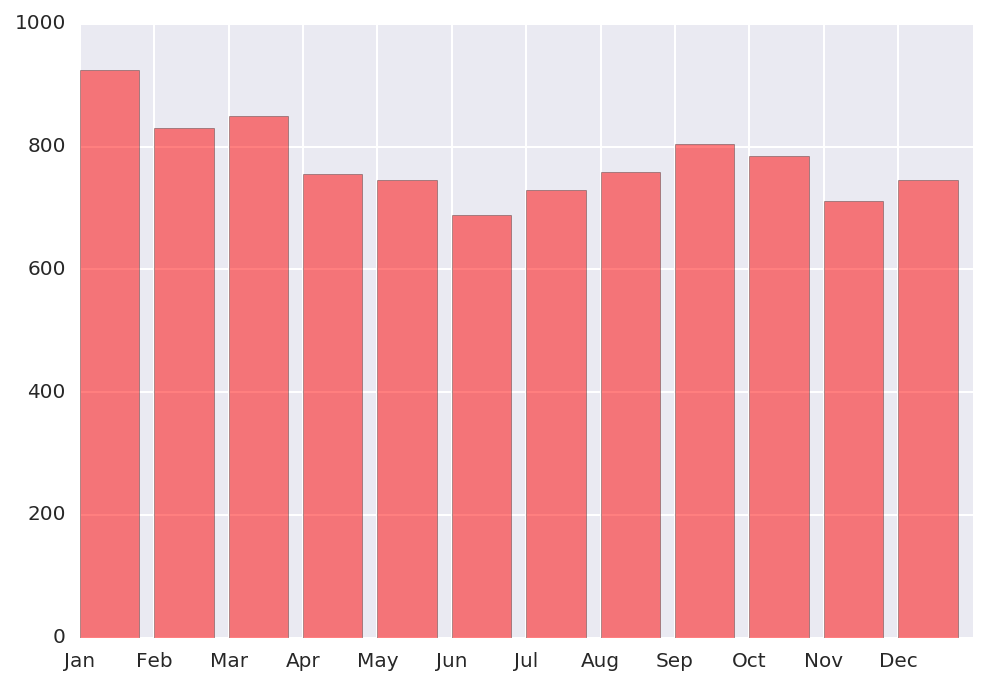

In [18]:
bar_plt2 = plt.bar(np.arange(len(df_mth.index)), df_mth.values, color="red", alpha=0.5)
plt.xticks(np.arange(len(df_mth.index)), tuple(df_mth.index));

In [20]:
# Investigate team average age
grouped = df_squads.groupby('year')
avg_age = df_squads.groupby('year').age.mean().to_frame()
# line plot avg_age.index vs avg_age.Age.values
# Possibly look at age and age variance by team, against team performance

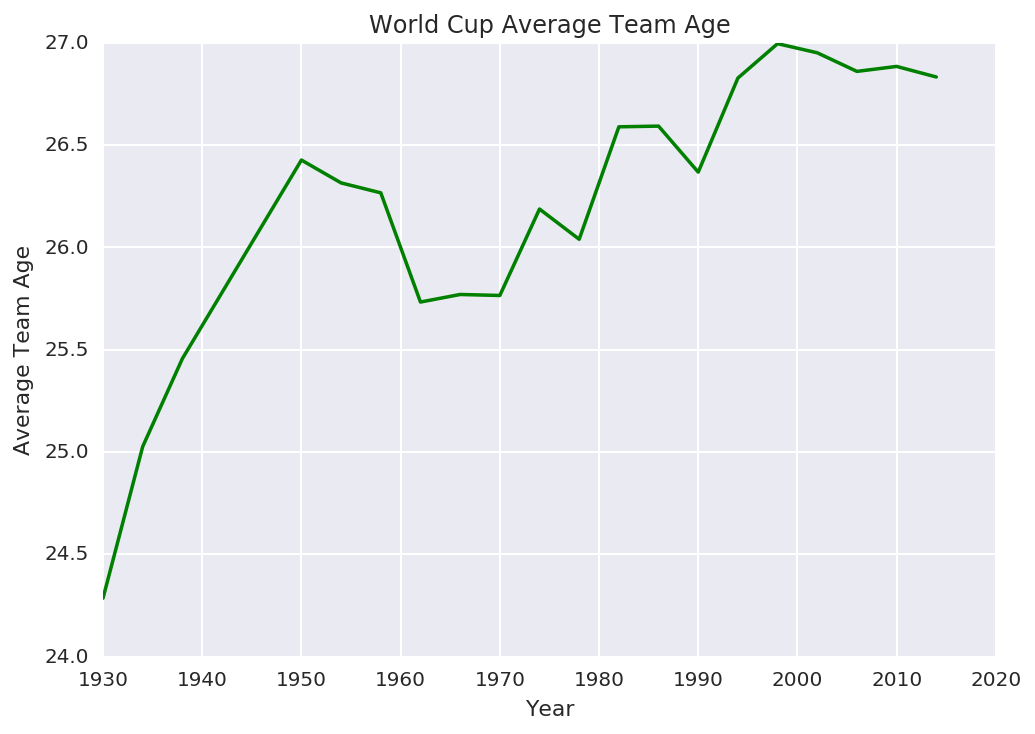

In [22]:
plt.plot(avg_age.index, avg_age.age.values, color='green')
plt.xlabel('Year');
plt.ylabel('Average Team Age');
plt.title('World Cup Average Team Age');

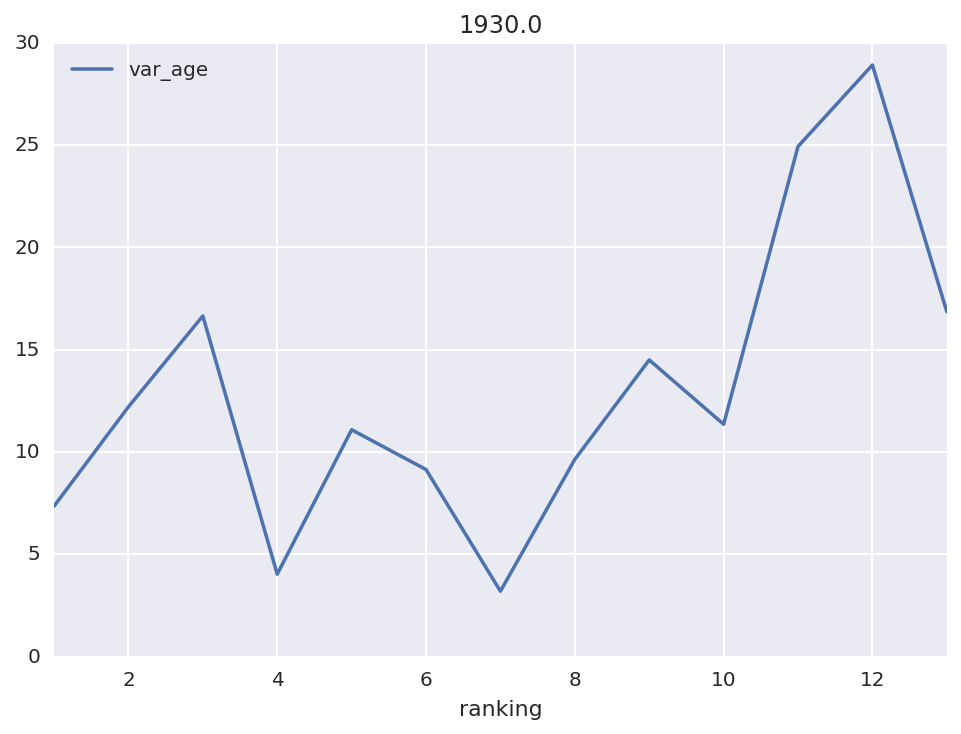

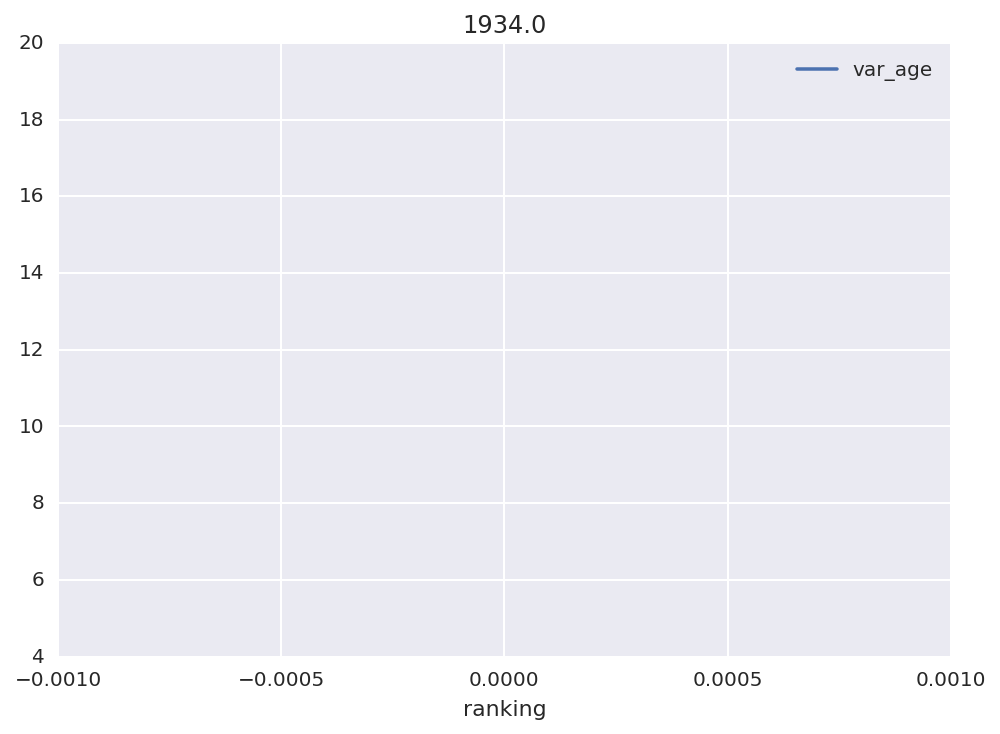

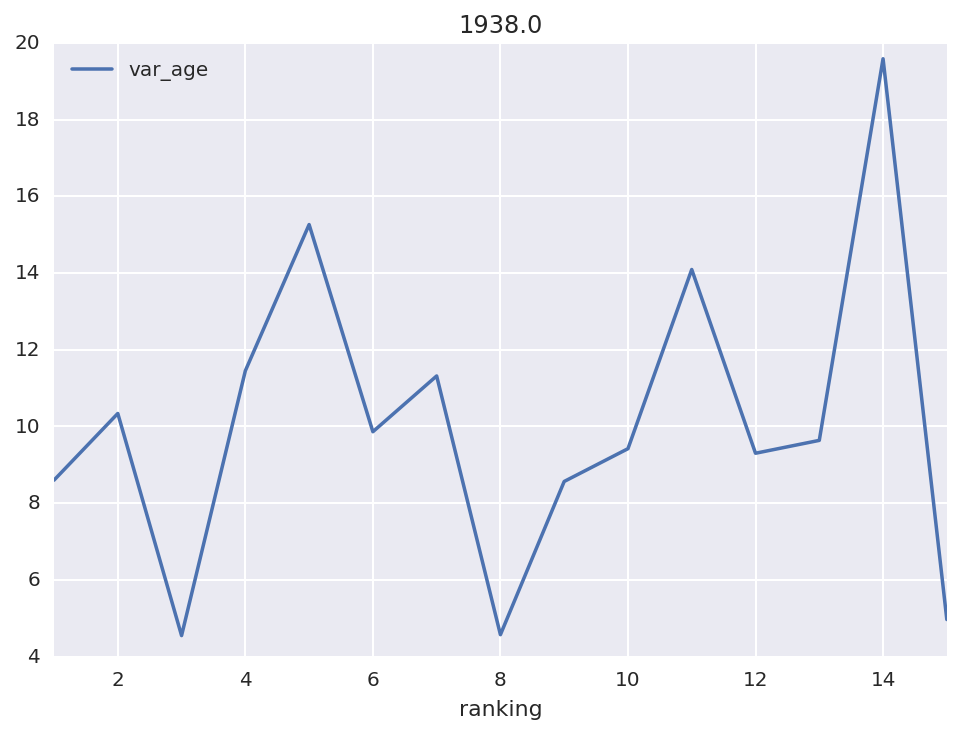

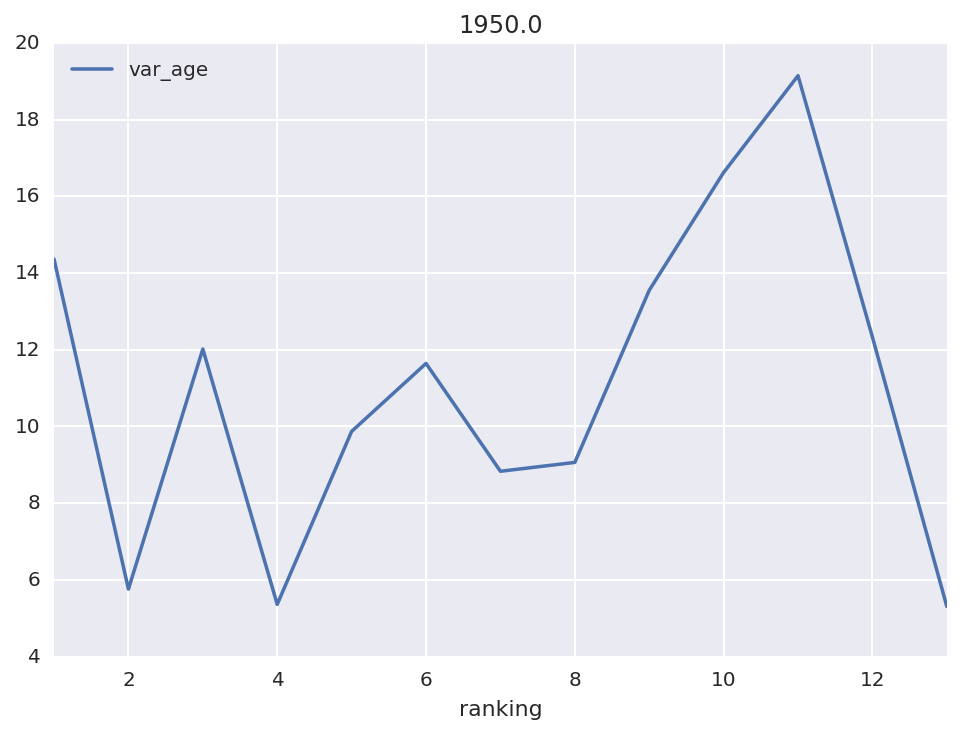

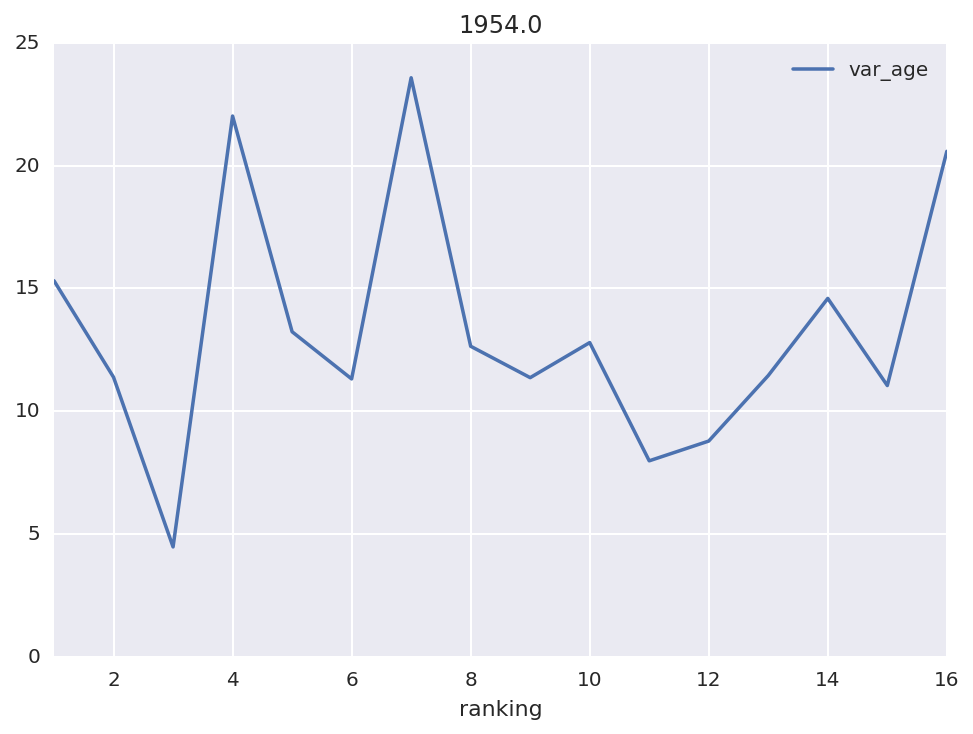

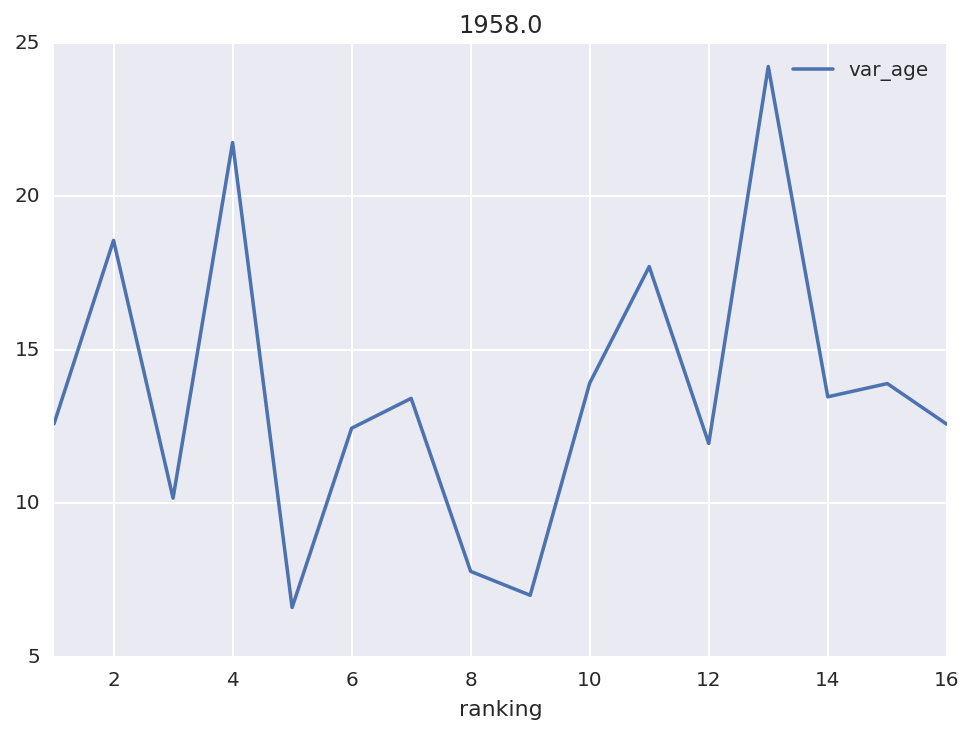

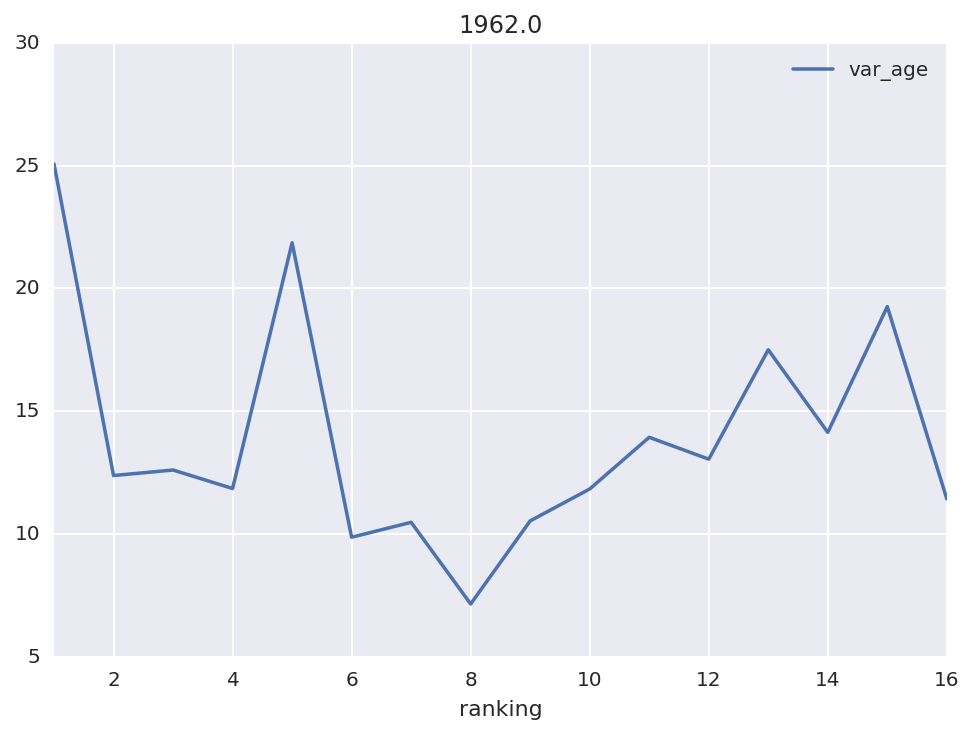

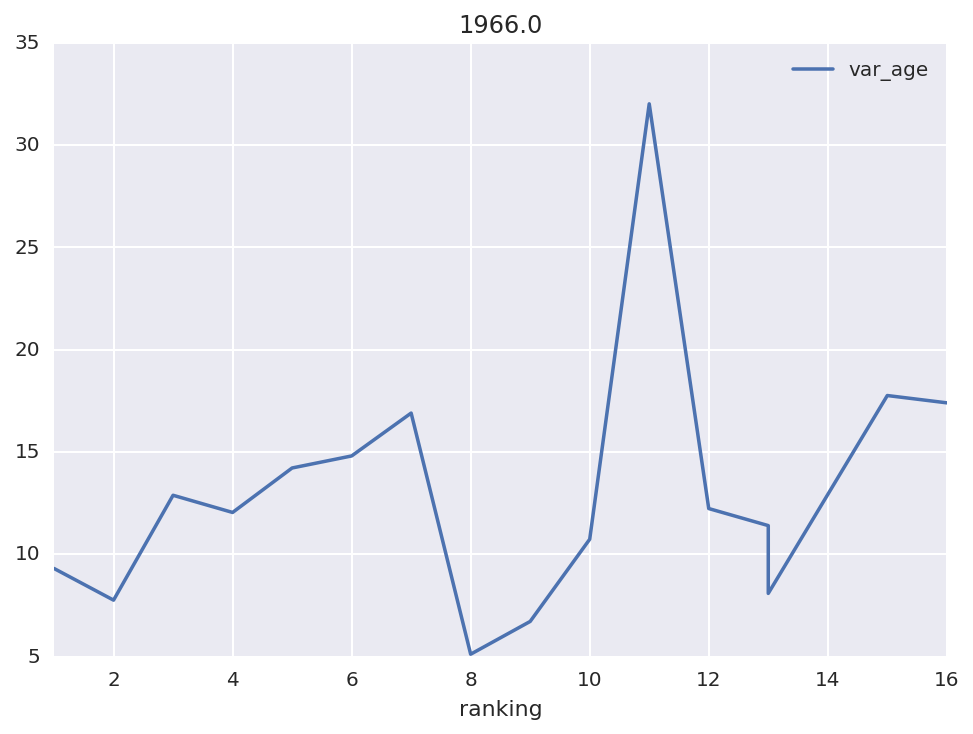

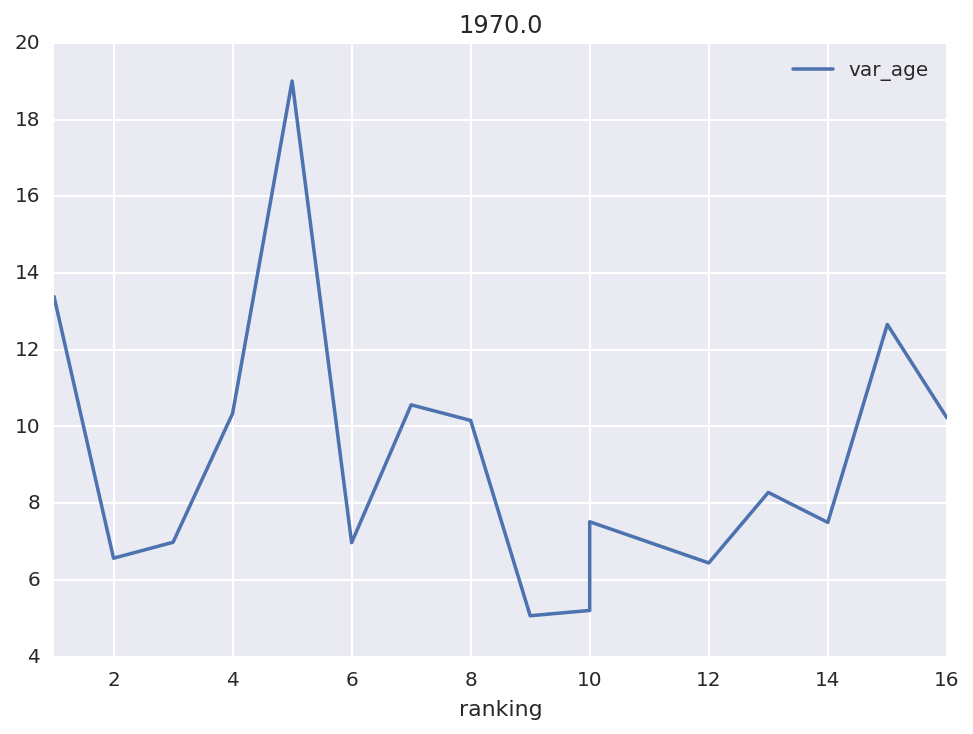

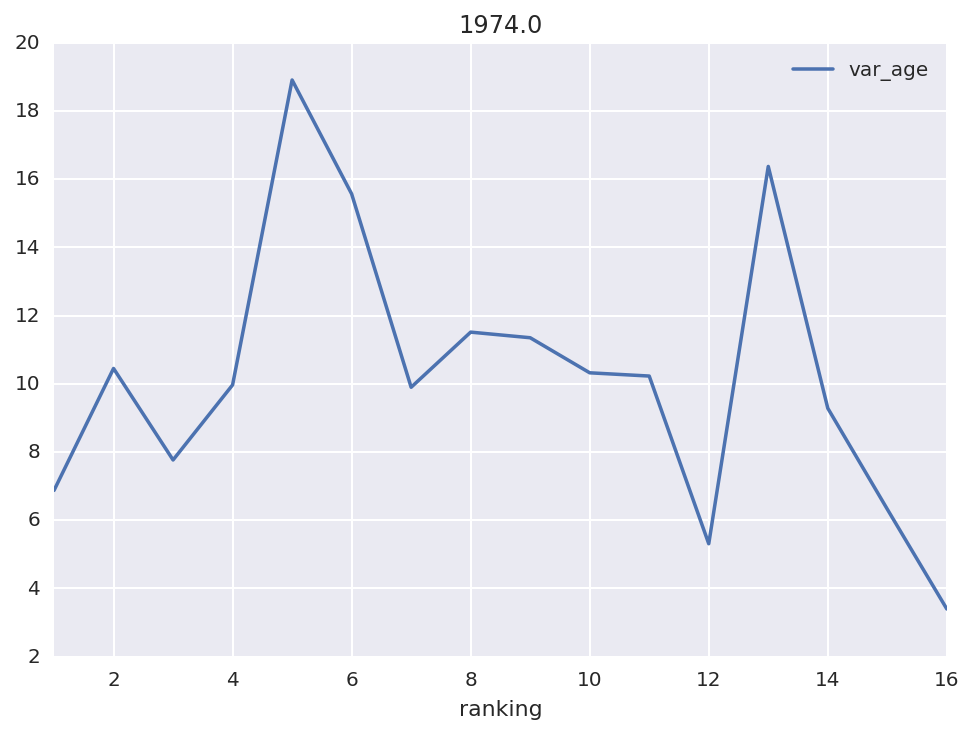

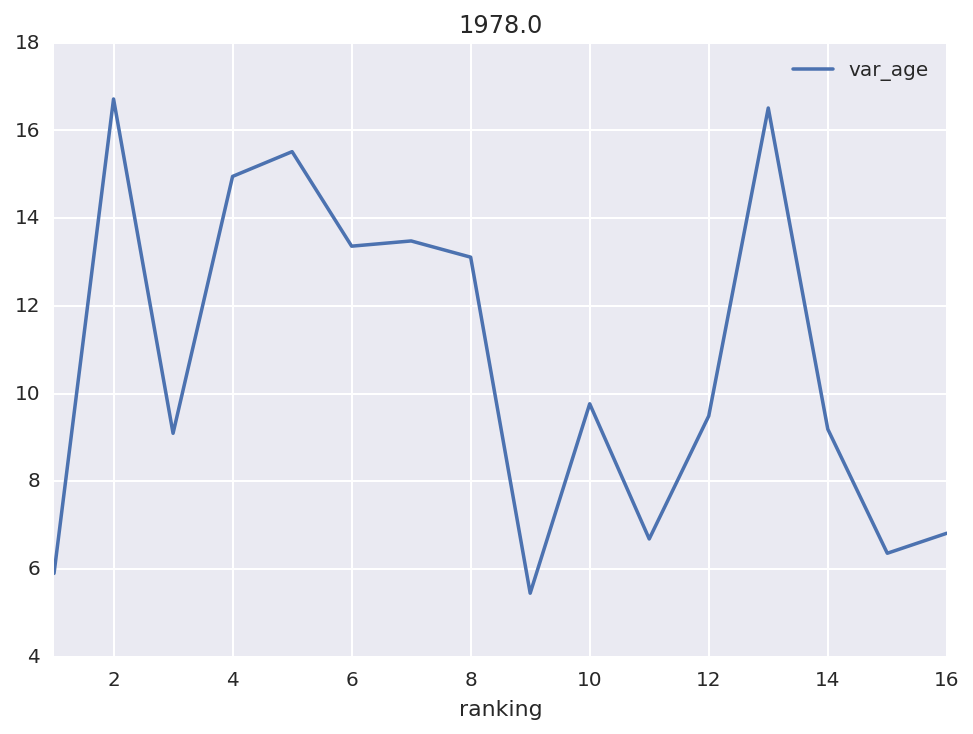

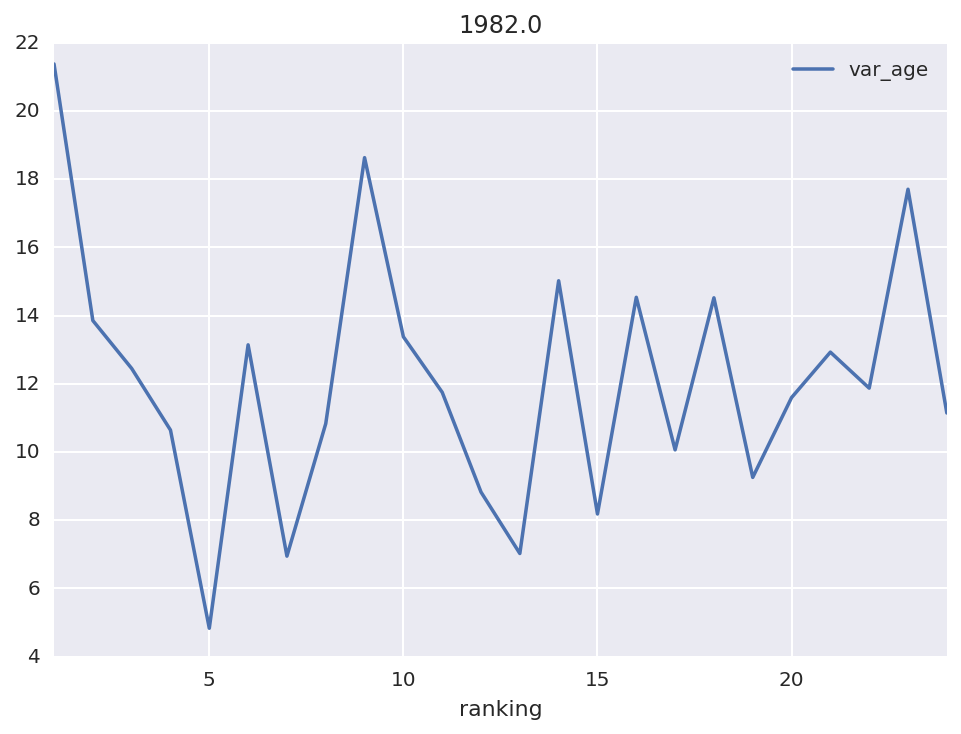

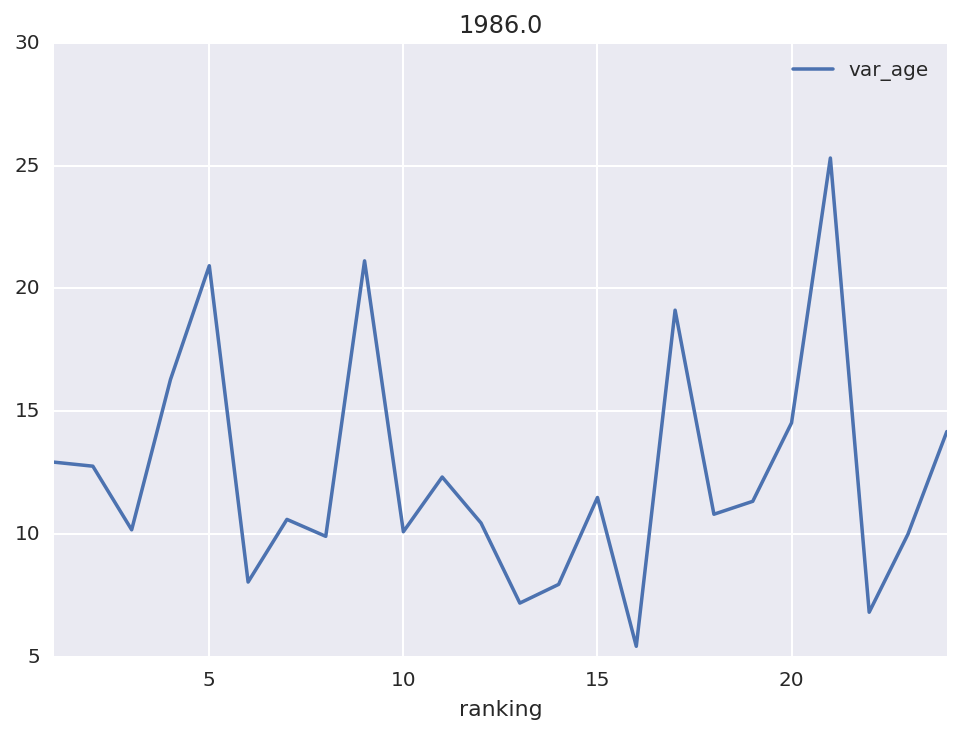

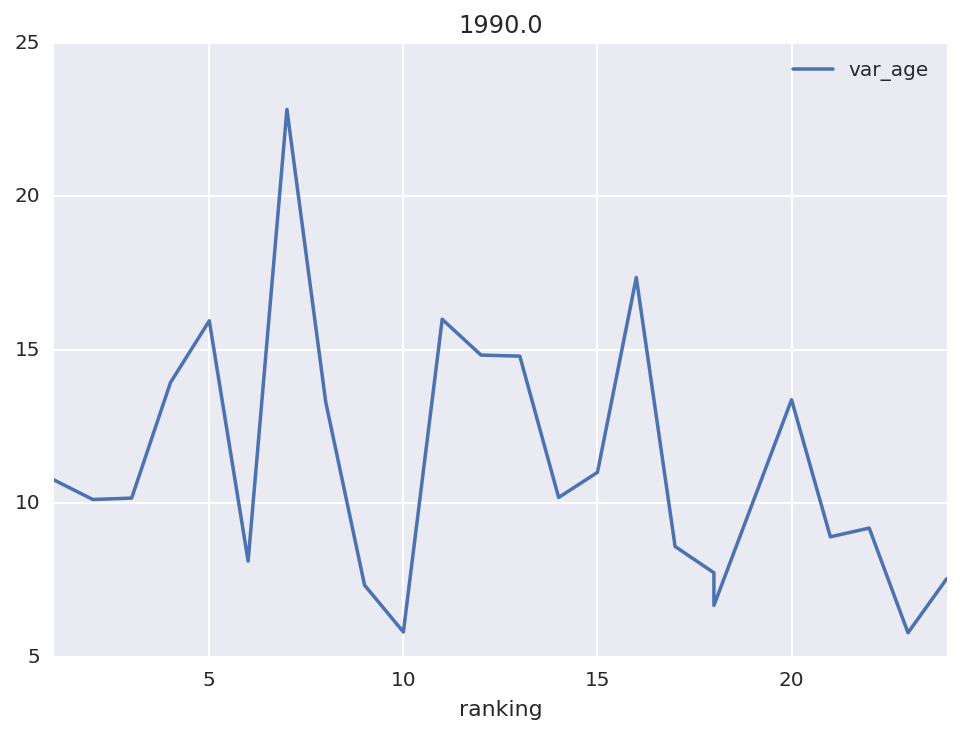

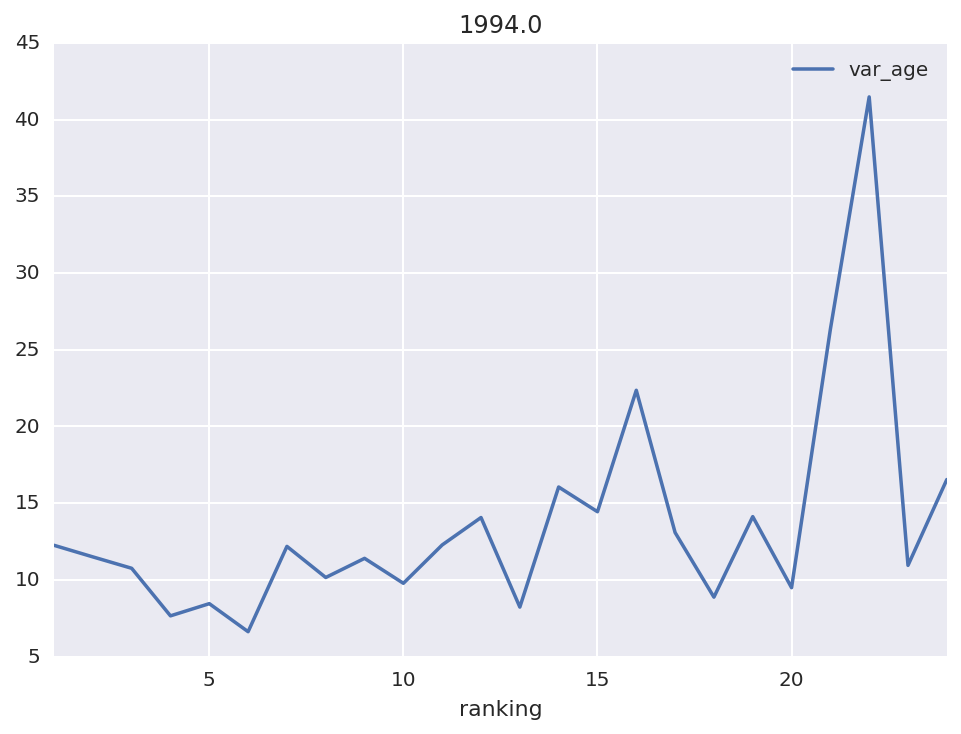

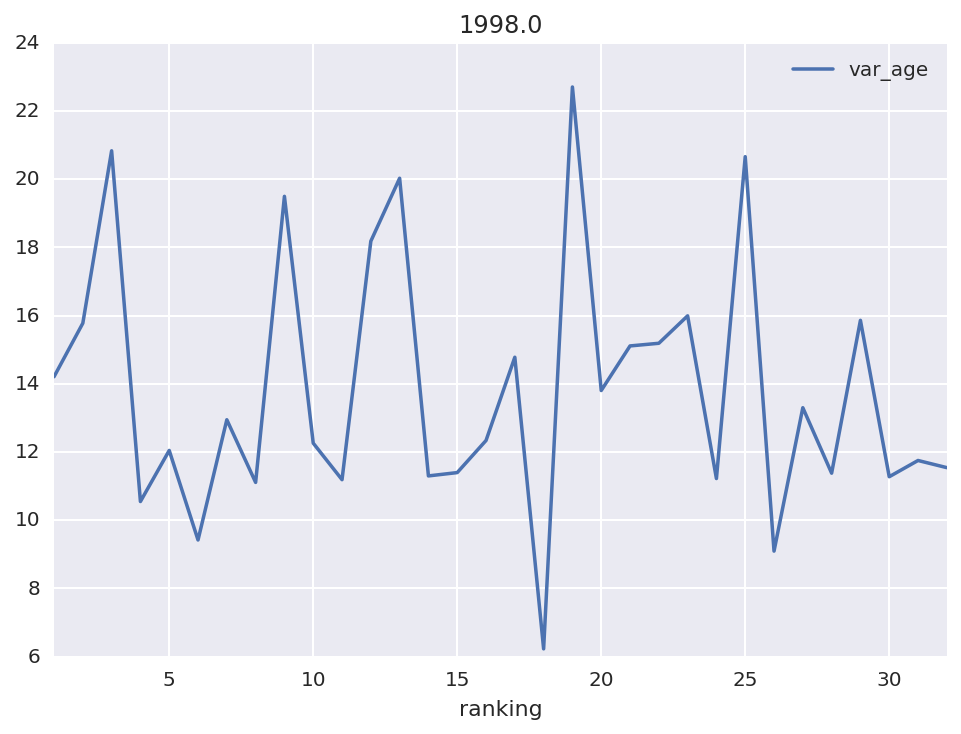

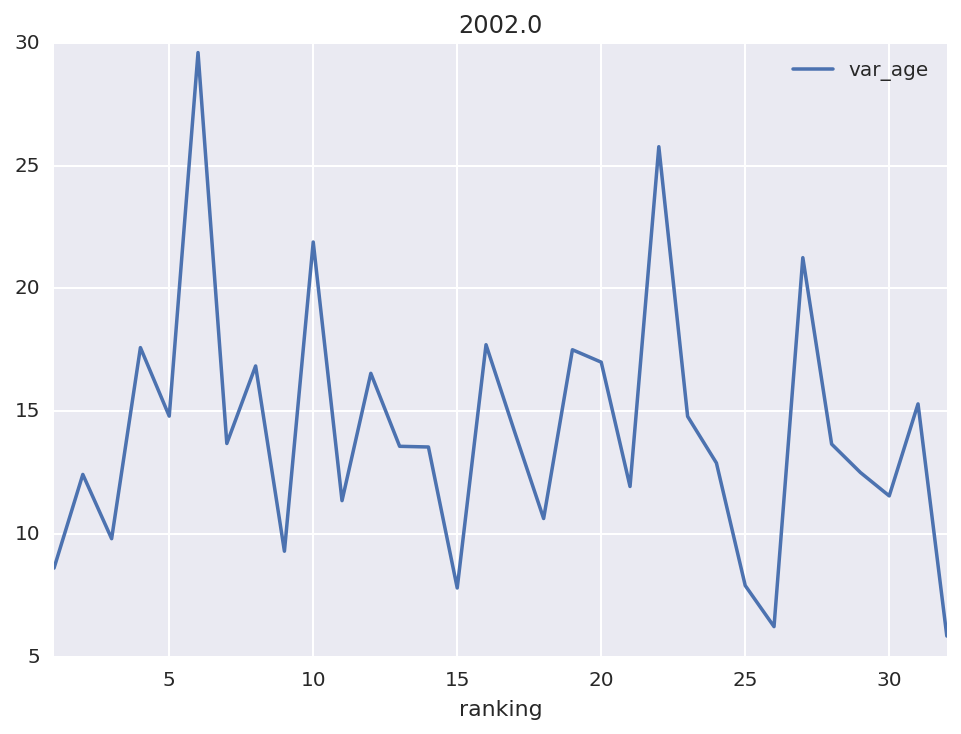

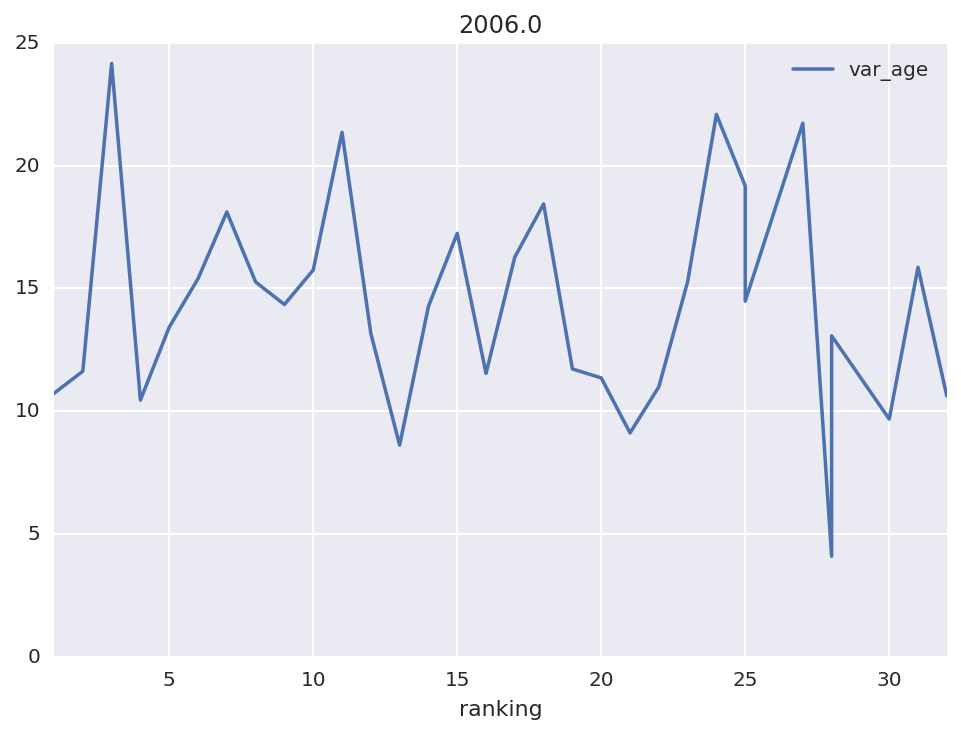

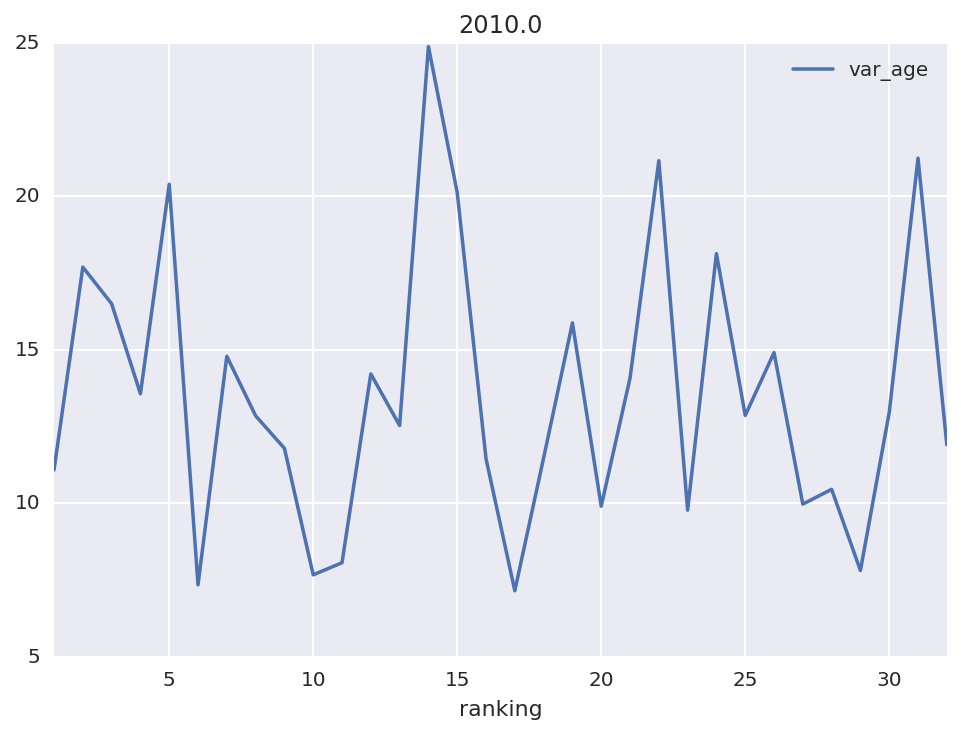

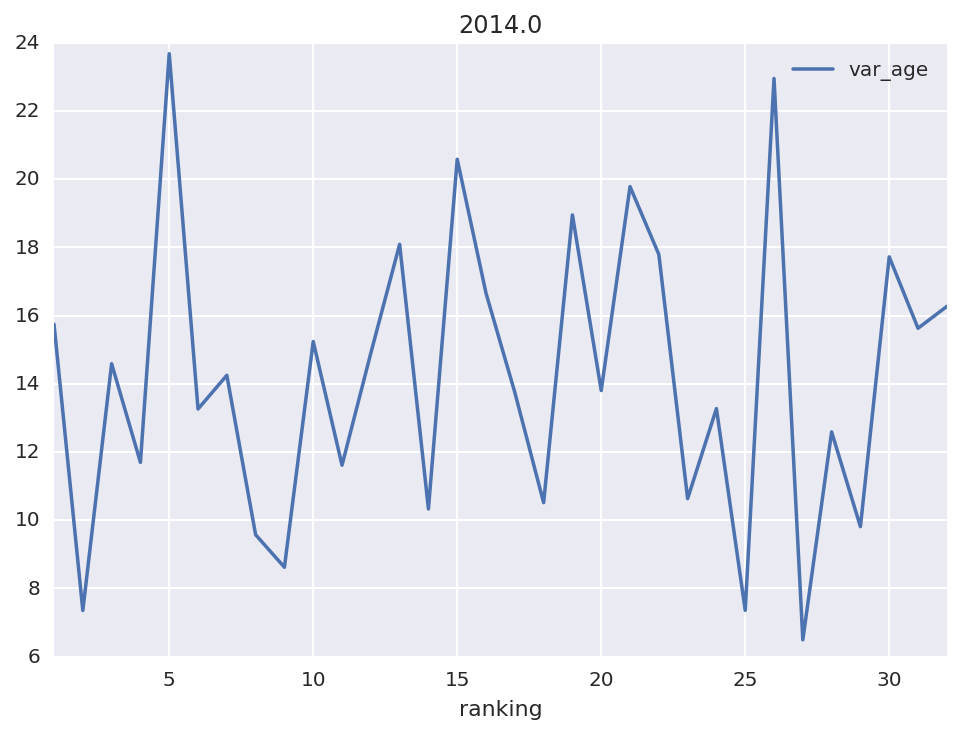

In [61]:
df_avg_age = df_squads.groupby(['year', 'team']).age.var().to_frame()
df_avg_age.columns = ['var_age']
df_rank_plyr_age = df_rank.join(df_avg_age, on=['year', 'team'], how="outer")
#grp_rank_age = df_rank_plyr_age.groupby('year')
for i, group in df_rank_plyr_age.groupby('year'):
    group.plot(x='ranking', y='var_age', title=str(i))
    plt.figure()
#df_avg_age#.replace(to_replace="West Germany", value="Germany").team.unique()

In [ ]:
for num, country in enumerate(df_clb_ctry.sum().sort_values(ascending=False).head(11).index):
    plt.scatter(df_clb_ctry.index, df_clb_ctry[country], alpha=0.8, color=next(palette), label=country)


In [39]:
print df_expats.season.unique()[0]
print df_expats.season.unique()[-1]

1993-94
2015-16
